**Visualize** your features (~ predictions for centroids of nuclei)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Functions import utilities, overlayPredictions
from ipywidgets import interact, widgets
from skimage import color
from skimage import io
from scipy import ndimage
import os, random

**User-defined** Features

In [2]:
predictionsdirectory='/home/manan/Desktop/01_Projects/25_Tomas_GradientLOG/03_Output/source/27102018/01_Blobs/'
imagedirectory='/home/manan/Desktop/01_Projects/25_Tomas_GradientLOG/01_Data/BM_dataset_MICCAI2015/source/' 
inline='yes'

**Pre-processing**

In [3]:
if inline=='yes':
    %matplotlib inline
else:
    %matplotlib qt
plt.close('all')


filename=random.choice(os.listdir(imagedirectory)) 
data=color.rgb2gray(plt.imread(imagedirectory+filename).astype('float32'))    
#data=plt.imread(imagefileaddress).astype('float32').sum(axis=-1)    


Obtain **Feature Detectors**

In [4]:
predictionsfilename=filename[:-3]+'csv'
blobs, headerdictionary=utilities.getDataAndHeader(predictionsdirectory, predictionsfilename)

 **Overlay predictions** on a random image and **visualize**

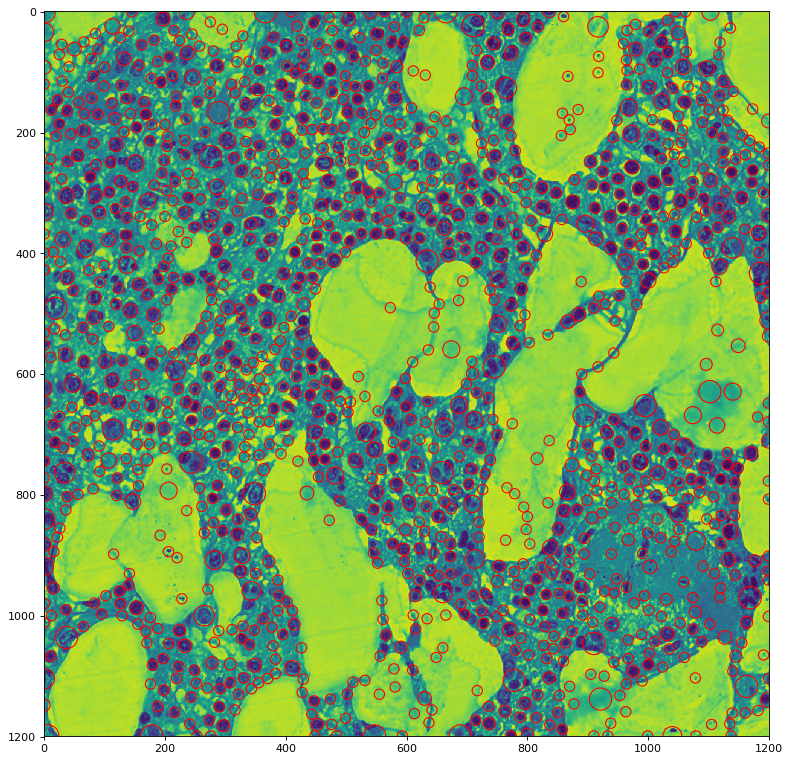

In [5]:
sketch_list = []      

if (headerdictionary['datatype']=='2D'):
    for blob in blobs:
        sketch_list=overlayPredictions.add_blobs2D(blob[2], blob[1], blob[0], sketch_list)
        
        
    fig, ax = plt.subplots(1, 1, figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
    rows, cols = data.shape
    image = ax.imshow(data[:, :])
    
    for blobprediction in sketch_list:
        ax.add_artist(blobprediction)
              

else:
    for blob in blobs:
        sketch_list=overlayPredictions.add_blobs3D(blob[3], blob[2], blob[0], blob[1],  z_x, sketch_list)
    @interact(currentslice = np.mean(blobs[:,3]))
    def update(currentslice):
        overlayPredictions.showSlice3D(data, currentslice, sketch_list[currentslice])


**Congrats**! Now, that you have visualized your nuclei predictions, let's proceed to **03_Evaluate_Performance_compared_to_Ground_Truth.ipynb** to see how well we are performing!